In [1]:
import pandas as pd

In [2]:
ECML = pd.read_json('..\BuiltDataset\ECMLDataSet_Standard.json','records')

E:\Anaconda3\envs\waf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Starting with Pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only
  """Entry point for launching an IPython kernel.


In [3]:
ECML

,payload,type
0,/l_t@/_feu1wvhtpass2/1nieqnnrvnzktuasain/tg1ar...,valid
1,crteyreti=wsn&et3tf6shov=tdsviee y fum$oh3;ore...,valid
2,lnujse/3.5.6.9,valid
3,"apnalto-md;q=0.6, asdn-ee, eai-5ns;q=0.0",valid
4,compress;q=0.1,valid
...,...,...
219035,eita7=8722556;l7js=twuptboy;3aotthg9r=62 or rh...,other
219036,kuts=nle;zdfhsre=xrzoi' or 1< n/taaart/o/child...,other
219037,nd9a=8 or 1< e8kil/nhea/ar/child::text()[posit...,other
219038,elsmaem=(i < count(ae/child::text()) and j < c...,other


In [4]:
HTTP = pd.read_json('..\BuiltDataset\HTTPDataSet_Standard.json','records')

E:\Anaconda3\envs\waf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Starting with Pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only
  """Entry point for launching an IPython kernel.


In [5]:
HTTP

,payload,type
0,c/ caridad s/n,valid
1,"campello, el",valid
2,40184,valid
3,1442431887503330,valid
4,nue37,valid
...,...,...
31062,"<script a="">"" id=xss src=""http://ha.ckers.org/...",xss
31063,"<script a="">"" '' id=xss src=""http://ha.ckers.o...",xss
31064,"<script ""a='>'"" id=xss src=""http://ha.ckers.or...",xss
31065,"<script a=`>` id=xss src=""http://ha.ckers.org/...",xss


In [6]:
XSS = pd.read_json('..\BuiltDataset\XSSDataSet_Standard.json','records')

E:\Anaconda3\envs\waf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Starting with Pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only
  """Entry point for launching an IPython kernel.


In [7]:
XSS

,payload,type
0,"<li><a href=""/wiki/file:socrates.png"" class=""i...",valid
1,"<tt onmouseover=""alert(1)"">test</tt>",xss
2,"</span> <span class=""reference-text"">steering ...",valid
3,"</span> <span class=""reference-text""><cite cla...",valid
4,"</span>. <a href=""/wiki/digital_object_identif...",valid
...,...,...
13681,<img onpointerenter=alert(1)>xss</img>,xss
13682,"<source onbeforepaste=""alert(1)"" contenteditab...",xss
13683,"<div draggable=""true"" contenteditable>drag me<...",xss
13684,"<li><cite id=""citerefdomingos2015"" class=""cita...",valid


In [8]:
Data = pd.concat([ECML,HTTP,XSS])
Data = Data[~Data['type'].isin(['other'])]

In [9]:
Data

,payload,type
0,/l_t@/_feu1wvhtpass2/1nieqnnrvnzktuasain/tg1ar...,valid
1,crteyreti=wsn&et3tf6shov=tdsviee y fum$oh3;ore...,valid
2,lnujse/3.5.6.9,valid
3,"apnalto-md;q=0.6, asdn-ee, eai-5ns;q=0.0",valid
4,compress;q=0.1,valid
...,...,...
13681,<img onpointerenter=alert(1)>xss</img>,xss
13682,"<source onbeforepaste=""alert(1)"" contenteditab...",xss
13683,"<div draggable=""true"" contenteditable>drag me<...",xss
13684,"<li><cite id=""citerefdomingos2015"" class=""cita...",valid


In [10]:
counts = Data['type'].value_counts()

In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='type'>

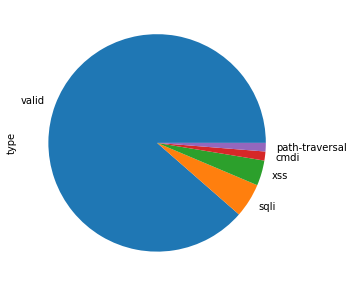

In [12]:
counts.plot.pie(figsize=(5, 5))

In [13]:
import numpy as np
X = Data['payload'].to_numpy().astype(str)
Y = Data['type'].to_numpy().astype(str)

In [14]:
print(len(X))
print(len(Y))

259177
259177


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

In [16]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y)

np.savez('dataset', trainX=trainX, testX=testX, trainY=trainY, testY=testY)

In [17]:
pipe = make_pipeline(TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024), SVC())

param_grid = {'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 4)], 'svc__C': [1, 10], 'svc__kernel': ['linear', 'rbf']}

grid = GridSearchCV(pipe, param_grid, cv = 2, verbose = 10)

grid.fit(trainX, trainY)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1), score=0.984, total= 3.2min
[CV] svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV]  svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1), score=0.983, total= 4.4min
[CV] svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.6min remaining:    0.0s


[CV]  svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2), score=0.993, total= 8.2min
[CV] svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2) 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 15.8min remaining:    0.0s


[CV]  svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2), score=0.993, total= 8.2min
[CV] svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4) 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 24.0min remaining:    0.0s


[CV]  svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4), score=0.994, total= 7.8min
[CV] svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4) 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 31.8min remaining:    0.0s


[CV]  svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4), score=0.994, total= 7.7min
[CV] svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1) ..


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 39.6min remaining:    0.0s


[CV]  svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1), score=0.993, total= 2.3min
[CV] svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1) ..


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 41.9min remaining:    0.0s


[CV]  svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1), score=0.993, total= 2.3min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 44.3min remaining:    0.0s


[CV] svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 2) ..
[CV]  svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 2), score=0.996, total=19.3min
[CV] svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 2) ..


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 63.6min remaining:    0.0s


[CV]  svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 2), score=0.995, total=19.0min
[CV] svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 4) ..
[CV]  svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 4), score=0.996, total=16.9min
[CV] svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 4) ..
[CV]  svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 4), score=0.996, total=17.6min
[CV] svc__C=10, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1) 
[CV]  svc__C=10, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1), score=0.986, total= 2.5min
[CV] svc__C=10, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1) 
[CV]  svc__C=10, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1), score=0.987, total= 2.5min
[CV] svc__C=10, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2) 
[CV]  svc__C=10, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2), score=0.996, total= 7.7min
[CV] svc__C=10, svc__kernel=linear, tfidfvect

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 241.9min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='char',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=1024,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                               

In [18]:
grid.score(testX,testY)

0.9979550891272475

In [19]:
grid.best_params_

{'svc__C': 10, 'svc__kernel': 'rbf', 'tfidfvectorizer__ngram_range': (1, 4)}

In [24]:
pipe = make_pipeline(TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024, ngram_range = (1, 4)), SVC(C = 10, kernel = 'rbf'))

pipe.fit(trainX, trainY)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1024,
                                 min_df=1, ngram_range=(1, 4), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='

In [25]:
pipe.score(testX, testY)

0.9979550891272475

In [26]:
from sklearn.metrics import classification_report

Prediction = pipe.predict(testX)

print(classification_report(testY, Prediction))

                precision    recall  f1-score   support

          cmdi       0.98      0.96      0.97       692
path-traversal       0.99      0.96      0.98       657
          sqli       1.00      0.98      0.99      2631
         valid       1.00      1.00      1.00     45910
           xss       1.00      1.00      1.00      1946

      accuracy                           1.00     51836
     macro avg       0.99      0.98      0.99     51836
  weighted avg       1.00      1.00      1.00     51836



In [27]:
import joblib

joblib.dump(pipe, 'TF-IDF_SVM_V1.1.joblib')
joblib.dump(pipe, 'TF-IDF_SVM_V1.1.m')

['TF-IDF_SVM_V1.1.m']

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
E:\Anaconda3\python.exe
